In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [20]:
df_reviews = pd.read_feather("../FilteredData/review_philly.feather")
df_users = pd.read_feather("../FilteredData/user_philly.feather")
df_buz = pd.read_feather("../FilteredData/business_philly.feather")

In [21]:
df_reviews.columns

Index(['_id', 'review_id', 'user_id', 'business_id', 'stars', 'useful',
       'funny', 'cool', 'text', 'date', 'compliment_count'],
      dtype='object')

In [22]:
df_users.columns

Index(['index', '_id', 'user_id', 'name', 'review_count', 'yelping_since',
       'useful', 'funny', 'cool', 'elite', 'friends', 'fans', 'average_stars',
       'compliment_hot', 'compliment_more', 'compliment_profile',
       'compliment_cute', 'compliment_list', 'compliment_note',
       'compliment_plain', 'compliment_cool', 'compliment_funny',
       'compliment_writer', 'compliment_photos', 'gender_score',
       'philly_reviews', 'philly_share_of_reviews',
       'bucketed_philly_share_of_reviews', 'bucketed_gender_scores',
       'average_stars_given', 'bucketed_average_stars_given',
       'bucketed_philly_reviews', 'positive_reviews_over_total_reviews'],
      dtype='object')

In [23]:
df_buz.columns

Index(['index', '_id', 'business_id', 'name', 'address', 'city', 'state',
       'postal_code', 'latitude', 'longitude', 'stars', 'review_count',
       'is_open', 'attributes', 'categories', 'hours', 'positive_%',
       'bucketed_average_stars_received', 'bucketed_sentiment_scores_received',
       'bucketed_review_count'],
      dtype='object')

In [24]:
df_users.rename(columns={"review_count":"user_review_count"}, inplace=True)

In [25]:
df_buz.rename(columns={"stars":"business_stars", "review_count":"business_review_count"}, inplace=True)

In [26]:
df_buz["positive_%"].isna().sum()

541

In [27]:
df_buz["postal_code"] = df_buz["postal_code"].fillna(0)

In [28]:
df_reviews[df_reviews.stars.isnull()]

,_id,review_id,user_id,business_id,stars,useful,funny,cool,text,date,compliment_count
852117,6327b024504265271679c187,nan,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,NaN,NaN,NaN,NaN,It's open even when you think it isn't,2013-08-18 00:56:08,0.0
852118,6327b024504265271679c199,nan,FQ-zmWPEG_pjSQx6pt3Efw,3ZynJ94VpIdDlaArmEp2Rg,NaN,NaN,NaN,NaN,"Yes, I'm eating here again. Breakfast!",2012-10-12 15:16:13,0.0
852119,6327b024504265271679c1a7,nan,YnlCpuaBa3qWBp4te8pGmA,XIKYdKWq72zUYsq8NBxcCQ,NaN,NaN,NaN,NaN,The honey glazed salmon is amazing!,2018-01-14 15:00:01,0.0
852120,6327b024504265271679c1b5,nan,Rr4cLb6Go91FT134o6RsKg,eMiN8nm70jjKg8izikVWDA,NaN,NaN,NaN,NaN,Mmm Yummy Crab Fries!,2011-10-16 23:43:10,0.0
852121,6327b024504265271679c1ba,nan,fJhr0G2JBNkfqpbIwkEQHg,eJ77e9lGxY3ArzaoDbHhYw,NaN,NaN,NaN,NaN,"Good specials, nice menu",2013-02-16 21:34:37,0.0
...,...,...,...,...,...,...,...,...,...,...,...
855075,6327b03050426527167a1746,nan,uChvFHK4uSifUXBPJPp9Zw,lCetcbxQr52TTGmGmXzQcw,NaN,NaN,NaN,NaN,Racist!!! Wont serve you if you are ethnic,2013-12-15 04:51:26,1.0
855076,6327b03050426527167a1749,nan,lP_cx94U8stOuQ8HrGecdQ,03jQGGJ2ch0uHTtW-UUUqg,NaN,NaN,NaN,NaN,Stuff face time.,2012-05-27 14:06:04,0.0
855077,6327b03050426527167a174c,nan,Rr4cLb6Go91FT134o6RsKg,UEGZ1nHUVb2ltGtd7C7X9w,NaN,NaN,NaN,NaN,Blizzard,2012-06-05 20:34:27,0.0
855078,6327b03050426527167a175b,nan,pflneuKFKQKQvZGDxebGFw,zsaDvomuMLe_-Ibtk9sA-A,NaN,NaN,NaN,NaN,Stopped by and it was closed on wed. 10/3/12!,2012-10-03 16:33:53,0.0


In [29]:
df_reviews = df_reviews[~df_reviews.stars.isna()]

In [30]:
df_users.replace([np.inf, -np.inf], 1, inplace=True)

In [37]:
features = ["user_id", "business_id", "stars", "target",
            "user_review_count", "average_stars", "philly_reviews", "philly_share_of_reviews", "gender_score", "positive_reviews_over_total_reviews", 
            "business_stars", "business_review_count", "bucketed_sentiment_scores_received", "postal_code"]

In [38]:
df_merged = df_reviews.merge(
    df_buz, 
    how="left", 
    left_on="business_id", 
    right_on="business_id"
)
df_merged = df_merged.merge(
    df_users,
    how="left",
    left_on="user_id",
    right_on="user_id"
)

In [39]:
def create_target(row):
    if row["stars"] <= 3:
        return 0
    else:
        return 1

In [40]:
df_merged["target"] = df_merged.apply(lambda x: create_target(x), axis=1)

In [41]:
df_merged.head(2)

,_id_x,review_id,user_id,business_id,stars,useful_x,funny_x,cool_x,text,date,...,gender_score,philly_reviews,philly_share_of_reviews,bucketed_philly_share_of_reviews,bucketed_gender_scores,average_stars_given,bucketed_average_stars_given,bucketed_philly_reviews,positive_reviews_over_total_reviews,target
0,631e9f7fedf65856ab0dfe3b,JrIxlS1TzJ-iCu79ul40cQ,eUta8W_HdHMXPzLBBZhL1A,04UD14gamNjLY0IDYVhHJg,1.0,1.0,2.0,1.0,I am a long term frequent customer of this est...,2015-09-23 23:10:31,...,0.5,1,0.250000,less_than_or_equal_to_25_percent,more_than_40_up_to_60_percent,1.000000,less_than_1,just_1,0.000000,0
1,631e9f7fedf65856ab0dfe3e,8JFGBuHMoiNDyfcxuWNtrA,smOvOajNG0lS4Pq7d8g4JQ,RZtGWDLCAtuipwaZ-UfjmQ,4.0,0.0,0.0,0.0,Good food--loved the gnocchi with marinara\nth...,2009-10-14 19:57:14,...,0.0,43,0.244318,less_than_or_equal_to_25_percent,less_than_or_equal_to_20_percent,3.325581,more_than_3_up_to_4,more_than_25_up_to_50,0.604651,1


In [42]:
df_merged = df_merged[features]

In [43]:
df_merged.shape[0] == df_reviews.shape[0]

True

In [44]:
df_train, df_val = train_test_split(
    df_merged, 
    test_size=0.2, 
    shuffle=True, 
    random_state=3
)

In [45]:
df_train.to_csv("./data/train.csv", index=False)
df_val.to_csv("./data/valid.csv", index=False)

In [46]:
df_train = pd.read_csv("./data/train.csv")
df_train.shape

(681693, 14)

In [47]:
df_merged["bucketed_sentiment_scores_received"]

0         more_than_60_up_to_80_percent
1         more_than_60_up_to_80_percent
2                  more_than_80_percent
3                  more_than_80_percent
4         more_than_60_up_to_80_percent
                      ...              
852112    more_than_60_up_to_80_percent
852113             more_than_80_percent
852114    more_than_60_up_to_80_percent
852115    more_than_60_up_to_80_percent
852116    more_than_60_up_to_80_percent
Name: bucketed_sentiment_scores_received, Length: 852117, dtype: object

## Feature Engineering

In [2]:
df_train = pd.read_csv("./data/train.csv")
df_val = pd.read_csv("./data/valid.csv")

In [49]:
df_train.head(3)

,user_id,business_id,stars,target,user_review_count,average_stars,philly_reviews,philly_share_of_reviews,gender_score,positive_reviews_over_total_reviews,business_stars,business_review_count,bucketed_sentiment_scores_received,postal_code
0,Ji99STK9EivKOZJh-fEU0A,CPpZTp1Lezhsfan8SgJs4Q,4.0,1,16,4.00,12,0.750000,0.996448,0.833333,3.5,58,more_than_40_up_to_60_percent,19147
1,be2p1Csa6xT7dJ1NVaPz1w,nk2a2nI1jfln9zLpxEvTnw,5.0,1,55,3.13,5,0.090909,0.996774,0.600000,4.5,178,more_than_80_percent,19130
2,9m1WybvjmsX2QhRnLK3CmQ,K0lttiVfWWP1u5JmsVp4cA,4.0,1,312,4.19,3,0.009615,0.916860,1.000000,4.5,202,more_than_60_up_to_80_percent,19107


Category variables
* business_id
* user_id
* postal_code
* bucketed_sentiment_scores_received

Normalize
* average_stars
* philly_reviews
* business_stars
* business_review_count

In [52]:
def plot_sparse(df, col):
    stats = df[[col, 'target']].groupby(col).agg(['count', 'mean', 'sum'])
    stats = stats.reset_index()
    stats.columns = [col, 'count', 'mean', 'sum']
    stats_sort = stats['count'].value_counts().reset_index()
    stats_sort = stats_sort.sort_values('index')
    plt.figure(figsize=(15,4))
    plt.bar(stats_sort['index'].astype(str).values[0:20], stats_sort['count'].values[0:20])
    plt.title('Frequency of ' + str(col))
    plt.xlabel('Number frequency')
    plt.ylabel('Frequency')

In [59]:
def plot_top20(df, col):
    stats = df[[col, 'target']].groupby(col).agg(['count', 'mean', 'sum'])
    stats = stats.reset_index()
    stats.columns = [col, 'count', 'mean', 'sum']
    stats = stats.sort_values('count', ascending=False)
    fig, ax1 = plt.subplots(figsize=(15,4))
    ax2 = ax1.twinx()
    ax1.bar(stats[col].astype(str).values[0:20], stats['count'].values[0:20])
    ax1.set_xticklabels(stats[col].astype(str).values[0:20], rotation='vertical')
    ax2.plot(stats['mean'].values[0:20], color='red')
    ax2.set_ylim(0,1)
    ax2.set_ylabel('Mean Target')
    ax1.set_ylabel('Frequency')
    ax1.set_xlabel(col)
    ax1.set_title('Top20 ' + col + 's based on frequency')

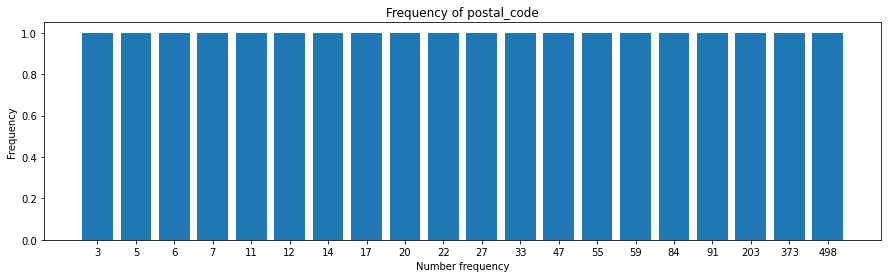

In [55]:
plot_sparse(df_train, 'postal_code')

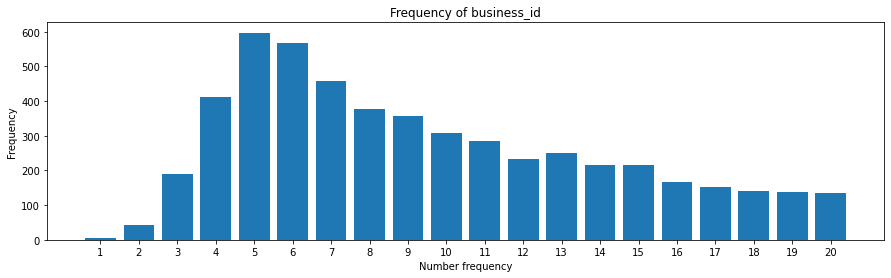

In [62]:
plot_sparse(df_train, 'business_id')

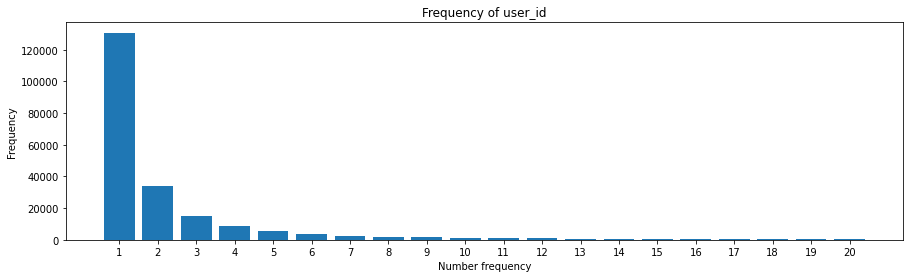

In [63]:
plot_sparse(df_train, 'user_id')

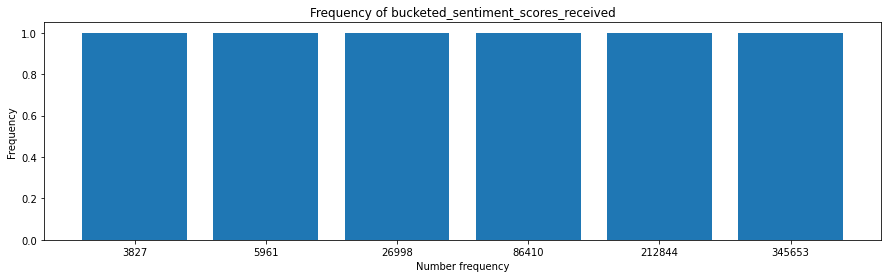

In [64]:
plot_sparse(df_train, 'bucketed_sentiment_scores_received')

/var/folders/dp/f69vs__d2xl1hb9zdnxjh2k80000gn/T/ipykernel_16220/1787131147.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(stats[col].astype(str).values[0:20], rotation='vertical')


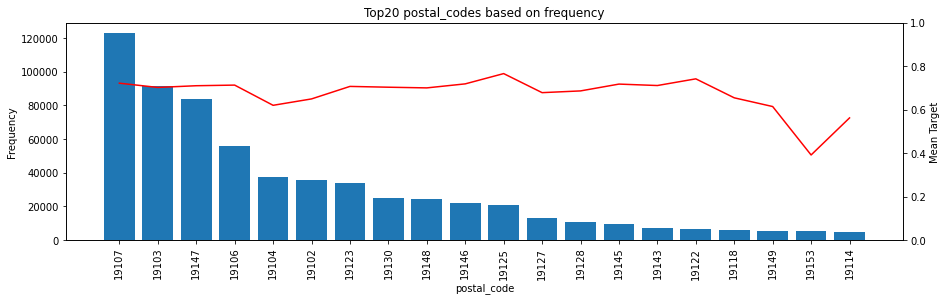

In [60]:
plot_top20(df_train, 'postal_code')

/var/folders/dp/f69vs__d2xl1hb9zdnxjh2k80000gn/T/ipykernel_16220/1787131147.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(stats[col].astype(str).values[0:20], rotation='vertical')


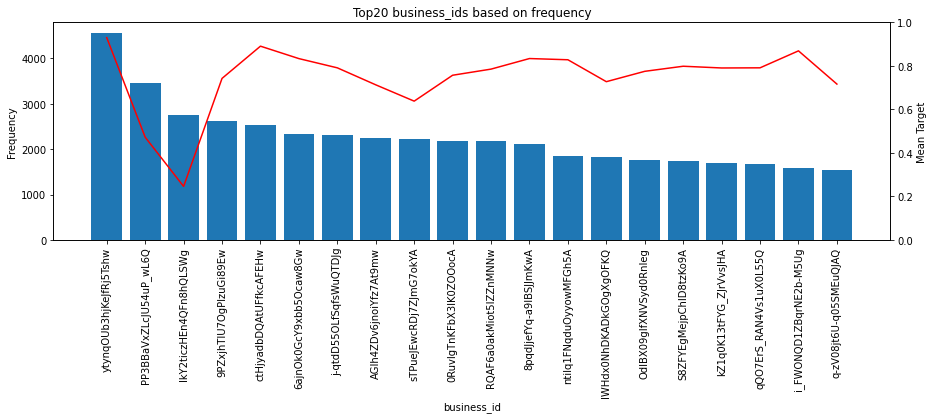

In [65]:
plot_top20(df_train, 'business_id')

/var/folders/dp/f69vs__d2xl1hb9zdnxjh2k80000gn/T/ipykernel_16220/1787131147.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(stats[col].astype(str).values[0:20], rotation='vertical')


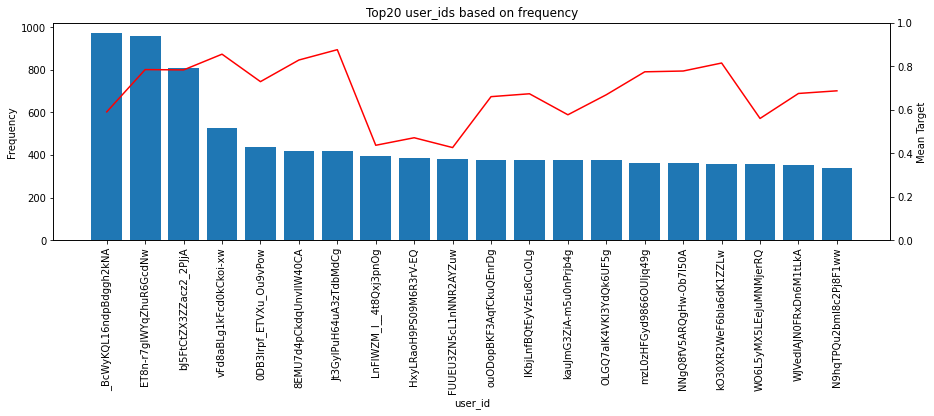

In [66]:
plot_top20(df_train, 'user_id')

/var/folders/dp/f69vs__d2xl1hb9zdnxjh2k80000gn/T/ipykernel_16220/1787131147.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(stats[col].astype(str).values[0:20], rotation='vertical')


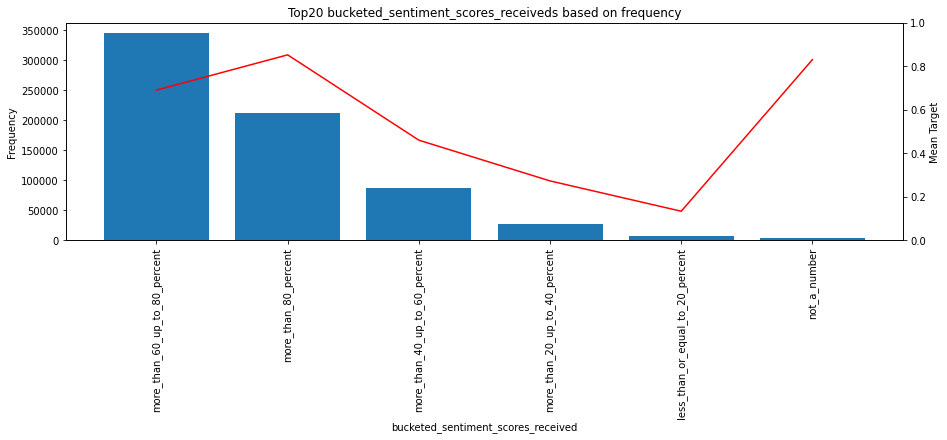

In [67]:
plot_top20(df_train, "bucketed_sentiment_scores_received")

### 1. Categorify

In [119]:
def categorify(df_train, df_valid, cat, threshold):
    if cat + '_Categorify' in df_train.columns:
        df_train = df_train.drop(cat + '_Categorify', axis=1)
    if cat + '_Categorify' in df_valid.columns:
        df_valid = df_valid.drop(cat + '_Categorify', axis=1)
    freq = df_train[cat].value_counts()
    freq = freq.reset_index()
    freq.columns = [cat, 'count']
    freq = freq.reset_index()
    freq.columns = [cat + '_Categorify', cat, 'count']
    freq_filtered = freq[freq['count']>threshold]
    freq_filtered[cat + '_Categorify'] = freq_filtered[cat + '_Categorify']+1
    freq_filtered = freq_filtered.drop('count', axis=1)
    df_train = df_train.merge(freq_filtered, how='left', on=cat)
    df_train[cat + '_Categorify'] = df_train[cat + '_Categorify'].fillna(0)
    # apply the categorify to validation set
    df_valid = df_valid.merge(freq_filtered, how='left', on=cat)
    df_valid[cat + '_Categorify'] = df_valid[cat + '_Categorify'].fillna(0)
    return df_train, df_valid

In [120]:
df_train.columns

Index(['user_id', 'business_id', 'stars', 'target', 'user_review_count',
       'average_stars', 'philly_reviews', 'philly_share_of_reviews',
       'gender_score', 'business_stars', 'business_review_count',
       'bucketed_sentiment_scores_received', 'postal_code',
       'postal_code_Categorify', 'user_id_Categorify',
       'business_id_Categorify',
       'bucketed_sentiment_scores_received_Categorify', 'TE_postal_code',
       'TE_business_id', 'TE_bucketed_sentiment_scores_received',
       'CE_postal_code', 'CE_bucketed_sentiment_scores_received',
       'philly_reviews_Norm', 'business_review_count_Norm'],
      dtype='object')

In [121]:
df_train['postal_code'].value_counts()[20:]

19119    4329
19129    3981
19116    3872
19115    3767
19131    3659
19134    3449
19152    2856
19136    2720
19120    2579
19111    2542
19135    2480
19154    2356
19144    2117
19121    2053
19139    2045
19140    2000
19124    1729
19151    1515
19126    1316
19176    1292
19138    1164
19150    1008
19132     741
19195     740
19142     632
19137     604
19141     595
19112     498
19133     373
19019     203
19155      91
0          84
19108      59
19454      55
19110      47
19093      33
19027      27
18976      22
19113      20
19446      17
19087      14
19004      12
19101      11
19092       7
8340        6
19444       5
19012       3
Name: postal_code, dtype: int64

In [122]:
df_train, df_val = categorify(df_train, df_val, 'postal_code', 100)

/var/folders/dp/f69vs__d2xl1hb9zdnxjh2k80000gn/T/ipykernel_74318/2435022324.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  freq_filtered[cat + '_Categorify'] = freq_filtered[cat + '_Categorify']+1


In [123]:
df_train['bucketed_sentiment_scores_received'].value_counts()

more_than_60_up_to_80_percent       345653
more_than_80_percent                212844
more_than_40_up_to_60_percent        86410
more_than_20_up_to_40_percent        26998
less_than_or_equal_to_20_percent      5961
not_a_number                          3827
Name: bucketed_sentiment_scores_received, dtype: int64

In [124]:
df_train, df_val = categorify(df_train, df_val, 'user_id', 0)
df_train, df_val = categorify(df_train, df_val, 'business_id', 0)
df_train, df_val = categorify(df_train, df_val, 'bucketed_sentiment_scores_received', 0)

In [125]:
(df_train.user_id_Categorify == 0).sum()

0

In [126]:
df_train

,user_id,business_id,stars,target,user_review_count,average_stars,philly_reviews,philly_share_of_reviews,gender_score,business_stars,...,TE_business_id,TE_bucketed_sentiment_scores_received,CE_postal_code,CE_bucketed_sentiment_scores_received,philly_reviews_Norm,business_review_count_Norm,postal_code_Categorify,user_id_Categorify,business_id_Categorify,bucketed_sentiment_scores_received_Categorify
0,Ji99STK9EivKOZJh-fEU0A,CPpZTp1Lezhsfan8SgJs4Q,4.0,1,16,4.00,12,0.750000,0.996448,3.5,...,0.663172,0.459374,83892,86410,0.009046,0.009272,3.0,9011,3079,3
1,be2p1Csa6xT7dJ1NVaPz1w,nk2a2nI1jfln9zLpxEvTnw,5.0,1,55,3.13,5,0.090909,0.996774,4.5,...,0.785753,0.851516,25054,212844,0.003289,0.030266,8.0,23173,1149,2
2,9m1WybvjmsX2QhRnLK3CmQ,K0lttiVfWWP1u5JmsVp4cA,4.0,1,312,4.19,3,0.009615,0.916860,4.5,...,0.781394,0.689510,123017,345653,0.001645,0.034465,1.0,83988,974,1
3,mM8dZe49n8tMA2L1DRgpRQ,43AC2TqfcQcenT6srX5QCA,1.0,0,15,3.44,5,0.333333,0.993145,2.5,...,0.575597,0.459374,25054,86410,0.003289,0.008397,8.0,34964,3339,3
4,_cgaflwgTtpo9eJHsqt-fA,GKBN0jG6f9XhvWmAEOgYPw,3.0,0,28,3.64,16,0.571429,0.003461,3.5,...,0.658980,0.689510,33836,345653,0.012336,0.075752,7.0,6535,320,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
681688,QqMeCZMhTFbvz7Em1Jfq5Q,TwnzM8mJn_nT2PJf1x-9kQ,4.0,1,337,4.14,201,0.596439,0.500000,4.0,...,0.797380,0.851516,33836,212844,0.164474,0.207138,7.0,160,48,2
681689,xP1Qv5sk2DbJIOaaSlnHuQ,UlckmYD4vBcd2GBI5FXy0w,4.0,1,1,4.00,1,1.000000,0.930371,4.0,...,0.767728,0.851516,25054,212844,0.000000,0.027642,8.0,214744,1267,2
681690,hMoovr65S28MRSa6Ks7lpQ,4J06--ty2Ydj1---IsArLw,4.0,1,7,4.14,6,0.857143,0.049826,3.5,...,0.618031,0.689510,24580,345653,0.004112,0.152029,9.0,17346,80,1
681691,hNc9ICYav-FcOkcKaGBZDw,4nJ1L8QMKujkh8_Oe4FK6A,4.0,1,416,4.14,137,0.329327,0.001162,4.0,...,0.701592,0.689510,35497,345653,0.111842,0.011372,6.0,347,2522,1


### 2. Target Encoding

* business id target encoding (business_stars)
* sentiment_scores target encoding
* postal_code target encoding

In [127]:
def target_encoding(df_train, df_valid, cat, lamda):
    if 'TE_' + cat in df_train.columns:
        df_train = df_train.drop('TE_' + cat, axis=1)
    if 'TE_' + cat in df_valid.columns:
        df_valid = df_valid.drop('TE_' + cat, axis=1)
    te = df_train[[cat, "target"]].groupby(cat).mean()
    te = te.reset_index()
    te.columns = [cat, 'TE_' + cat]
    freq = df_train[cat].value_counts()
    freq = freq.reset_index()
    freq.columns = [cat, "count"]
    te = te.merge(freq, how='left', on=cat)
    glob_mean = df_train["target"].mean()
    te['TE_' + cat] = (te["count"] * te['TE_' + cat] + lamda * glob_mean) / (te['count'] + lamda)
    te = te.drop("count", axis=1)
    df_train = df_train.merge(te, how='left', on=cat)
    df_valid = df_valid.merge(te, how='left', on=cat)
    return df_train, df_valid

In [128]:
df_train, df_val = target_encoding(df_train, df_val, "postal_code", 80)

In [129]:
df_train, df_val = target_encoding(df_train, df_val, "business_id", 80)

In [130]:
df_train, df_val = target_encoding(df_train, df_val, "bucketed_sentiment_scores_received", 80)

In [131]:
df_train

,user_id,business_id,stars,target,user_review_count,average_stars,philly_reviews,philly_share_of_reviews,gender_score,business_stars,...,CE_bucketed_sentiment_scores_received,philly_reviews_Norm,business_review_count_Norm,postal_code_Categorify,user_id_Categorify,business_id_Categorify,bucketed_sentiment_scores_received_Categorify,TE_postal_code,TE_business_id,TE_bucketed_sentiment_scores_received
0,Ji99STK9EivKOZJh-fEU0A,CPpZTp1Lezhsfan8SgJs4Q,4.0,1,16,4.00,12,0.750000,0.996448,3.5,...,86410,0.009046,0.009272,3.0,9011,3079,3,0.709573,0.663172,0.459374
1,be2p1Csa6xT7dJ1NVaPz1w,nk2a2nI1jfln9zLpxEvTnw,5.0,1,55,3.13,5,0.090909,0.996774,4.5,...,212844,0.003289,0.030266,8.0,23173,1149,2,0.702722,0.785753,0.851516
2,9m1WybvjmsX2QhRnLK3CmQ,K0lttiVfWWP1u5JmsVp4cA,4.0,1,312,4.19,3,0.009615,0.916860,4.5,...,345653,0.001645,0.034465,1.0,83988,974,1,0.721287,0.781394,0.689510
3,mM8dZe49n8tMA2L1DRgpRQ,43AC2TqfcQcenT6srX5QCA,1.0,0,15,3.44,5,0.333333,0.993145,2.5,...,86410,0.003289,0.008397,8.0,34964,3339,3,0.702722,0.575597,0.459374
4,_cgaflwgTtpo9eJHsqt-fA,GKBN0jG6f9XhvWmAEOgYPw,3.0,0,28,3.64,16,0.571429,0.003461,3.5,...,345653,0.012336,0.075752,7.0,6535,320,1,0.706399,0.658980,0.689510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
681688,QqMeCZMhTFbvz7Em1Jfq5Q,TwnzM8mJn_nT2PJf1x-9kQ,4.0,1,337,4.14,201,0.596439,0.500000,4.0,...,212844,0.164474,0.207138,7.0,160,48,2,0.706399,0.797380,0.851516
681689,xP1Qv5sk2DbJIOaaSlnHuQ,UlckmYD4vBcd2GBI5FXy0w,4.0,1,1,4.00,1,1.000000,0.930371,4.0,...,212844,0.000000,0.027642,8.0,214744,1267,2,0.702722,0.767728,0.851516
681690,hMoovr65S28MRSa6Ks7lpQ,4J06--ty2Ydj1---IsArLw,4.0,1,7,4.14,6,0.857143,0.049826,3.5,...,345653,0.004112,0.152029,9.0,17346,80,1,0.699604,0.618031,0.689510
681691,hNc9ICYav-FcOkcKaGBZDw,4nJ1L8QMKujkh8_Oe4FK6A,4.0,1,416,4.14,137,0.329327,0.001162,4.0,...,345653,0.111842,0.011372,6.0,347,2522,1,0.648993,0.701592,0.689510


### 3. Count Encoding
* postal_code
* bucketed_sentiment_scores_received

In [132]:
def count_encoding(df_train, df_valid, cat):
    if 'CE_' + cat in df_train.columns:
        df_train = df_train.drop('CE_' + cat, axis=1)
    if 'CE_' + cat in df_valid.columns:
        df_valid = df_valid.drop('CE_' + cat, axis=1)
    ce = df_train[cat].value_counts()
    ce = ce.reset_index()
    ce.columns = [cat, 'CE_' + cat]
    df_train = df_train.merge(ce, how='left', left_on=cat, right_on=cat)
    df_valid = df_valid.merge(ce, how='left', left_on=cat, right_on=cat)
    return df_train, df_val

In [133]:
df_train, df_val = count_encoding(df_train, df_val, "postal_code")

In [134]:
df_train, df_val = count_encoding(df_train, df_val, "bucketed_sentiment_scores_received")

### 4. Normalize Numerical Features (scale to 0-1)

In [135]:
def normalize(df_train, df_valid, cat):
    X = df_train[cat]
    train_min = X.min()
    train_max = X.max()
    X_norm = (X - train_min) / (train_max - train_min)
    df_train[cat + "_Norm"] = X_norm
    df_valid[cat + "_Norm"] = (df_valid[cat] - train_min) / (train_max - train_min)
    return df_train, df_valid

In [136]:
df_train, df_val = normalize(df_train, df_val, "philly_reviews")

In [137]:
df_train, df_val = normalize(df_train, df_val, "business_review_count")

In [138]:
df_train

,user_id,business_id,stars,target,user_review_count,average_stars,philly_reviews,philly_share_of_reviews,gender_score,business_stars,...,business_review_count_Norm,postal_code_Categorify,user_id_Categorify,business_id_Categorify,bucketed_sentiment_scores_received_Categorify,TE_postal_code,TE_business_id,TE_bucketed_sentiment_scores_received,CE_postal_code,CE_bucketed_sentiment_scores_received
0,Ji99STK9EivKOZJh-fEU0A,CPpZTp1Lezhsfan8SgJs4Q,4.0,1,16,4.00,12,0.750000,0.996448,3.5,...,0.009272,3.0,9011,3079,3,0.709573,0.663172,0.459374,83892,86410
1,be2p1Csa6xT7dJ1NVaPz1w,nk2a2nI1jfln9zLpxEvTnw,5.0,1,55,3.13,5,0.090909,0.996774,4.5,...,0.030266,8.0,23173,1149,2,0.702722,0.785753,0.851516,25054,212844
2,9m1WybvjmsX2QhRnLK3CmQ,K0lttiVfWWP1u5JmsVp4cA,4.0,1,312,4.19,3,0.009615,0.916860,4.5,...,0.034465,1.0,83988,974,1,0.721287,0.781394,0.689510,123017,345653
3,mM8dZe49n8tMA2L1DRgpRQ,43AC2TqfcQcenT6srX5QCA,1.0,0,15,3.44,5,0.333333,0.993145,2.5,...,0.008397,8.0,34964,3339,3,0.702722,0.575597,0.459374,25054,86410
4,_cgaflwgTtpo9eJHsqt-fA,GKBN0jG6f9XhvWmAEOgYPw,3.0,0,28,3.64,16,0.571429,0.003461,3.5,...,0.075752,7.0,6535,320,1,0.706399,0.658980,0.689510,33836,345653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
681688,QqMeCZMhTFbvz7Em1Jfq5Q,TwnzM8mJn_nT2PJf1x-9kQ,4.0,1,337,4.14,201,0.596439,0.500000,4.0,...,0.207138,7.0,160,48,2,0.706399,0.797380,0.851516,33836,212844
681689,xP1Qv5sk2DbJIOaaSlnHuQ,UlckmYD4vBcd2GBI5FXy0w,4.0,1,1,4.00,1,1.000000,0.930371,4.0,...,0.027642,8.0,214744,1267,2,0.702722,0.767728,0.851516,25054,212844
681690,hMoovr65S28MRSa6Ks7lpQ,4J06--ty2Ydj1---IsArLw,4.0,1,7,4.14,6,0.857143,0.049826,3.5,...,0.152029,9.0,17346,80,1,0.699604,0.618031,0.689510,24580,345653
681691,hNc9ICYav-FcOkcKaGBZDw,4nJ1L8QMKujkh8_Oe4FK6A,4.0,1,416,4.14,137,0.329327,0.001162,4.0,...,0.011372,6.0,347,2522,1,0.648993,0.701592,0.689510,35497,345653


In [139]:
df_train.to_csv("./data/train.csv", index=False)
df_val.to_csv("./data/valid.csv", index=False)